# Deep Q Learning 

### Learning Rate = 0.001, batch_size = 32, 64 neurons per hidden layer, 2 hidden layers

C:\Users\nkroh\AppData\Local\Temp\ipykernel_24280\3215004654.py:34: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  sample_choices = np.array(memory)


Episode = 0, Score = -261.95300624648564, Avg_Score = -261.95300624648564
Episode = 1, Score = -148.82760549251947, Avg_Score = -205.39030586950255
Episode = 2, Score = -404.7684183007672, Avg_Score = -271.84967667992413
Episode = 3, Score = -287.19172112969153, Avg_Score = -275.685187792366
Episode = 4, Score = -338.7416024822295, Avg_Score = -288.2964707303387
Episode = 5, Score = -91.17497365137399, Avg_Score = -255.44288788384452
Episode = 6, Score = -361.4594645393522, Avg_Score = -270.5881131203456
Episode = 7, Score = -336.1137605418229, Avg_Score = -278.7788190480303
Episode = 8, Score = -527.9018683784275, Avg_Score = -306.45915786251885
Episode = 9, Score = -231.24817608976457, Avg_Score = -298.93805968524345
Episode = 11, Score = -280.4062322485171, Avg_Score = -297.2533481000865
Episode = 12, Score = -272.2198736823581, Avg_Score = -295.16722523194244
Episode = 14, Score = -314.83655144029865, Avg_Score = -296.6802503248929
Episode = 21, Score = -228.7624963695895, Avg_Scor

Episode = 720, Score = 201.1700366460043, Avg_Score = -134.44140454104024
Episode = 721, Score = 246.9788544618831, Avg_Score = -129.2494172595978
Episode = 724, Score = -51.30199974818197, Avg_Score = -126.61407174267666
Episode = 737, Score = 188.32519058832008, Avg_Score = -122.44319487309754
Episode = 739, Score = 258.15492202283986, Avg_Score = -118.32990346215192
Episode = 740, Score = 220.98981010445652, Avg_Score = -113.42538270988483
Episode = 741, Score = -60.856140183535544, Avg_Score = -111.74251882766818
Episode = 742, Score = 228.50841459507043, Avg_Score = -107.02420109443314
Episode = 744, Score = -63.89258735740139, Avg_Score = -106.29586056962495
Episode = 745, Score = -61.288847023080734, Avg_Score = -104.31207315335614
Episode = 746, Score = 243.50355609270986, Avg_Score = -99.9391925368374
Episode = 747, Score = -107.29644259789133, Avg_Score = -98.08266034286953
Episode = 748, Score = -104.96530964288124, Avg_Score = -96.97417629173106
Episode = 749, Score = -132.

Episode = 939, Score = 254.86192672935715, Avg_Score = 167.90188306611554
Episode = 941, Score = -188.96846159400195, Avg_Score = 167.06185154660434
Episode = 942, Score = 200.50505369926998, Avg_Score = 170.38824468812112
Episode = 943, Score = 193.84547539124887, Avg_Score = 173.13090178753868
Episode = 944, Score = 249.063395369299, Avg_Score = 172.91773217750455
Episode = 946, Score = 255.75920910184203, Avg_Score = 173.2460854459127
Episode = 948, Score = 274.44490698207335, Avg_Score = 174.10348775804007
Episode = 950, Score = 45.00975518931986, Avg_Score = 174.38185953305037
Episode = 951, Score = 174.79259534407103, Avg_Score = 173.47126727976087
Episode = 952, Score = -238.4852152239769, Avg_Score = 168.44191452003696
Episode = 954, Score = 202.2117719245532, Avg_Score = 167.90365502742262
Episode = 955, Score = 258.37044947410925, Avg_Score = 170.5647569281225
Episode = 957, Score = 259.71550915594423, Avg_Score = 170.9974833785823
Episode = 959, Score = 249.71028776894116, A

ValueError: Format '001-32-64' is not supported (supported formats: eps, jpeg, jpg, pdf, pgf, png, ps, raw, rgba, svg, svgz, tif, tiff)

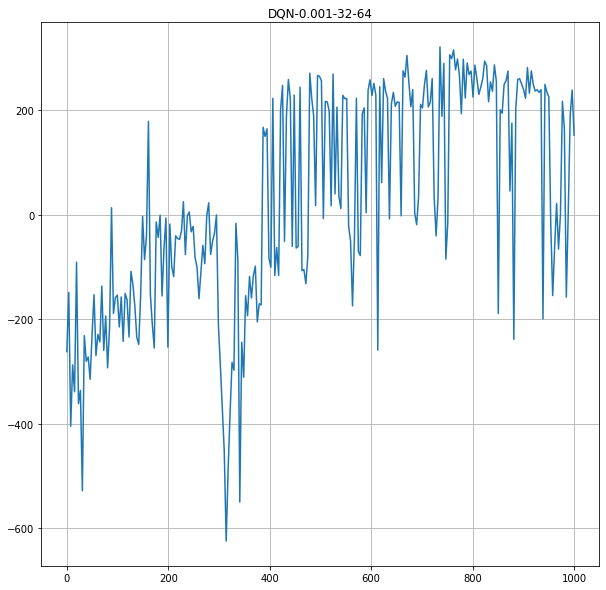

In [5]:
'''
Refrenece: https://github.com/psulkava/deep-reinforcement-learning-with-gym, https://deeplearning.neuromatch.io/projects/ReinforcementLearning/lunar_lander.html
'''

import numpy as np
import keras
import tensorflow as tf 
from keras.activations import relu, linear
# import import_ipynb
import lunar_lander as lander
from collections import deque
import matplotlib.pyplot as plt
import gym
import random
from tensorflow.keras.utils import to_categorical

learning_rate = 0.001
model = keras.Sequential()
model.trainable=True
model.add(keras.layers.Dense(64, input_dim=8, activation=relu))
model.add(keras.layers.Dense(64, activation=relu))
model.add(keras.layers.Dense(4, activation=linear))
model.compile(loss="mse", optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate ))

epsilon = 1
gamma = .99
batch_size = 32
memory = deque(maxlen=1000000)
min_eps = 0.01
model = model

def replay_experiences():
    if len(memory) >= batch_size:
        sample_choices = np.array(memory)
        mini_batch_index = np.random.choice(len(sample_choices), batch_size)
        #batch = random.sample(memory, batch_size)
        states = []
        actions = []
        next_states = []
        rewards = []
        finishes = []
        for index in mini_batch_index:
            states.append(memory[index][0])
            actions.append(memory[index][1])
            next_states.append(memory[index][2])
            rewards.append(memory[index][3])
            finishes.append(memory[index][4])
        states = np.array(states)
        actions = np.array(actions)
        next_states = np.array(next_states)
        rewards = np.array(rewards)
        finishes = np.array(finishes)
        states = np.squeeze(states)
        next_states = np.squeeze(next_states)
        q_vals_next_state = model.predict_on_batch(next_states)
        q_vals_target = model.predict_on_batch(states)
        max_q_values_next_state = np.amax(q_vals_next_state, axis=1)
        q_vals_target[np.arange(batch_size), actions] = rewards + gamma * (max_q_values_next_state) * (1 - finishes)
        model.fit(states, q_vals_target, verbose=0)
        global epsilon
        if epsilon > min_eps:
            epsilon *= 0.9


if __name__ == '__main__':
    env = lander.LunarLander()
    r_seq = []
    # env.seed(0)
    num_episodes = 1000
    np.random.seed(0)
    scores  = []
    for i in range(num_episodes+1):
        score = 0
        state = env.reset()
        finished = False
        if i != 0 and i % 50 == 0:
            model.save(".\\saved_models\\model_"+str(i)+"_episodes.h5")
        for j in range(500):
            print(f'Timestep {j}',end='\r')
            state = np.reshape(state, (1, 8))
            if np.random.random() <= epsilon:
                action =  np.random.choice(4)
            else:
                action_values = model.predict(state)
                action = np.argmax(action_values[0])

            if i>900: env.render()
            next_state, reward, finished, metadata = env.step(action)
            next_state = np.reshape(next_state, (1, 8))
            memory.append((state, action, next_state, reward, finished))
            replay_experiences()
            score += reward
            state = next_state
            if finished:
                scores.append(score)
                #r_seq.append(score)
                print("Episode = {}, Score = {}, Avg_Score = {}".format(i, score, np.mean(scores[-100:])))
                break
        if i == num_episodes:
            y = np.array(scores)
            x = np.linspace(0, num_episodes, y.shape[0])
            plt.figure(figsize=[10,10])
            plt.plot(x, y)
            plt.title('DQN-0.001-32-64')
            plt.grid()
            plt.savefig("DQN-0.001-32-64.png")
            plt.close()
            np.savetxt("DQN-0.001-32-64.txt", y)

### Learning Rate = 0.001, batch_size = 64, 64 neurons per hidden layer, 2 hidden layers

In [ ]:
import numpy as np
import keras
import tensorflow as tf 
from keras.activations import relu, linear
import import_ipynb
import lunar_lander as lander
from collections import deque
import matplotlib.pyplot as plt
import gym
import random
from tensorflow.keras.utils import to_categorical

learning_rate = 0.001
model = keras.Sequential()
model.add(keras.layers.Dense(64, input_dim=8, activation=relu))
model.add(keras.layers.Dense(64, activation=relu))
model.add(keras.layers.Dense(4, activation=linear))
model.compile(loss="mse", optimizer=tf.keras.optimizers.Adam(lr=learning_rate ))

epsilon = 1
gamma = .99
batch_size = 64
memory = deque(maxlen=1000000)
min_eps = 0.01
model = model

def replay_experiences():
    if len(memory) >= batch_size:
        sample_choices = np.array(memory)
        mini_batch_index = np.random.choice(len(sample_choices), batch_size)
        #batch = random.sample(memory, batch_size)
        states = []
        actions = []
        next_states = []
        rewards = []
        finishes = []
        for index in mini_batch_index:
            states.append(memory[index][0])
            actions.append(memory[index][1])
            next_states.append(memory[index][2])
            rewards.append(memory[index][3])
            finishes.append(memory[index][4])
        states = np.array(states)
        actions = np.array(actions)
        next_states = np.array(next_states)
        rewards = np.array(rewards)
        finishes = np.array(finishes)
        states = np.squeeze(states)
        next_states = np.squeeze(next_states)
        q_vals_next_state = model.predict_on_batch(next_states)
        q_vals_target = model.predict_on_batch(states)
        max_q_values_next_state = np.amax(q_vals_next_state, axis=1)
        q_vals_target[np.arange(batch_size), actions] = rewards + gamma * (max_q_values_next_state) * (1 - finishes)
        model.fit(states, q_vals_target, verbose=0)
        global epsilon
        if epsilon > min_eps:
            epsilon *= 0.9


if __name__ == '__main__':
    env = lander.LunarLander()
    r_seq = []
    # env.seed(0)
    num_episodes = 1000
    np.random.seed(0)
    scores  = []
    for i in range(num_episodes+1):
        score = 0
        state = env.reset()
        finished = False
        if i != 0 and i % 50 == 0:
            model.save(".\saved_models\model_"+str(i)+"_episodes.h5")
        for j in range(3000):
            state = np.reshape(state, (1, 8))
            if np.random.random() <= epsilon:
                action =  np.random.choice(4)
            else:
                action_values = model.predict(state)
                action = np.argmax(action_values[0])

            env.render()
            next_state, reward, finished, metadata = env.step(action)
            next_state = np.reshape(next_state, (1, 8))
            memory.append((state, action, next_state, reward, finished))
            replay_experiences()
            score += reward
            state = next_state
            if finished:
                scores.append(score)
                #r_seq.append(score)
                print("Episode = {}, Score = {}, Avg_Score = {}".format(i, score, np.mean(scores[-100:])))
                break
        if i == num_episodes:
            y = np.array(scores)
            x = np.linspace(0, num_episodes, y.shape[0])
            plt.figure(figsize=[10,10])
            plt.plot(x, y)
            plt.title('DQN-0.001-64-64')
            plt.grid()
            plt.savefig("DQN-0.001-64-64.jpg")
            plt.close()
            np.savetxt("DQN-0.001-64-64.txt", y)

### Learning Rate = 0.0015, batch_size = 64, 64 neurons per hidden layer, 2 hidden layers

In [ ]:
import numpy as np
import keras
import tensorflow as tf 
from keras.activations import relu, linear
import import_ipynb
import lunar_lander as lander
from collections import deque
import matplotlib.pyplot as plt
import gym
import random
from tensorflow.keras.utils import to_categorical

learning_rate = 0.0015
model = keras.Sequential()
model.add(keras.layers.Dense(64, input_dim=8, activation=relu))
model.add(keras.layers.Dense(64, activation=relu))
model.add(keras.layers.Dense(4, activation=linear))
model.compile(loss="mse", optimizer=tf.keras.optimizers.Adam(lr=learning_rate ))

epsilon = 1
gamma = .99
batch_size = 64
memory = deque(maxlen=1000000)
min_eps = 0.01
model = model

def replay_experiences():
    if len(memory) >= batch_size:
        sample_choices = np.array(memory)
        mini_batch_index = np.random.choice(len(sample_choices), batch_size)
        #batch = random.sample(memory, batch_size)
        states = []
        actions = []
        next_states = []
        rewards = []
        finishes = []
        for index in mini_batch_index:
            states.append(memory[index][0])
            actions.append(memory[index][1])
            next_states.append(memory[index][2])
            rewards.append(memory[index][3])
            finishes.append(memory[index][4])
        states = np.array(states)
        actions = np.array(actions)
        next_states = np.array(next_states)
        rewards = np.array(rewards)
        finishes = np.array(finishes)
        states = np.squeeze(states)
        next_states = np.squeeze(next_states)
        q_vals_next_state = model.predict_on_batch(next_states)
        q_vals_target = model.predict_on_batch(states)
        max_q_values_next_state = np.amax(q_vals_next_state, axis=1)
        q_vals_target[np.arange(batch_size), actions] = rewards + gamma * (max_q_values_next_state) * (1 - finishes)
        model.fit(states, q_vals_target, verbose=0)
        global epsilon
        if epsilon > min_eps:
            epsilon *= 0.9


if __name__ == '__main__':
    env = lander.LunarLander()
    r_seq = []
    # env.seed(0)
    num_episodes = 1000
    np.random.seed(0)
    scores  = []
    for i in range(num_episodes+1):
        score = 0
        state = env.reset()
        finished = False
        if i != 0 and i % 50 == 0:
            model.save(".\saved_models\model_"+str(i)+"_episodes.h5")
        for j in range(3000):
            state = np.reshape(state, (1, 8))
            if np.random.random() <= epsilon:
                action =  np.random.choice(4)
            else:
                action_values = model.predict(state)
                action = np.argmax(action_values[0])

            env.render()
            next_state, reward, finished, metadata = env.step(action)
            next_state = np.reshape(next_state, (1, 8))
            memory.append((state, action, next_state, reward, finished))
            replay_experiences()
            score += reward
            state = next_state
            if finished:
                scores.append(score)
                #r_seq.append(score)
                print("Episode = {}, Score = {}, Avg_Score = {}".format(i, score, np.mean(scores[-100:])))
                break
        if i == num_episodes:
            y = np.array(scores)
            x = np.linspace(0, num_episodes, y.shape[0])
            plt.figure(figsize=[10,10])
            plt.plot(x, y)
            plt.title('DQN-0.0015-64-64.txt')
            plt.grid()
            plt.savefig("DQN-0.0015-64-64.jpg")
            plt.close()
            np.savetxt("DQN-0.0015-64-64.txt", y)

### Learning Rate = 0.002, batch_size = 64, 64 neurons per hidden layer, 2 hidden layers

In [ ]:
import numpy as np
import keras
import tensorflow as tf 
from keras.activations import relu, linear
import import_ipynb
import lunar_lander as lander
from collections import deque
import matplotlib.pyplot as plt
import gym
import random
from tensorflow.keras.utils import to_categorical

learning_rate = 0.002
model = keras.Sequential()
model.add(keras.layers.Dense(64, input_dim=8, activation=relu))
model.add(keras.layers.Dense(64, activation=relu))
model.add(keras.layers.Dense(4, activation=linear))
model.compile(loss="mse", optimizer=tf.keras.optimizers.Adam(lr=learning_rate ))

epsilon = 1
gamma = .99
batch_size = 64
memory = deque(maxlen=1000000)
min_eps = 0.01
model = model

def replay_experiences():
    if len(memory) >= batch_size:
        sample_choices = np.array(memory)
        mini_batch_index = np.random.choice(len(sample_choices), batch_size)
        #batch = random.sample(memory, batch_size)
        states = []
        actions = []
        next_states = []
        rewards = []
        finishes = []
        for index in mini_batch_index:
            states.append(memory[index][0])
            actions.append(memory[index][1])
            next_states.append(memory[index][2])
            rewards.append(memory[index][3])
            finishes.append(memory[index][4])
        states = np.array(states)
        actions = np.array(actions)
        next_states = np.array(next_states)
        rewards = np.array(rewards)
        finishes = np.array(finishes)
        states = np.squeeze(states)
        next_states = np.squeeze(next_states)
        q_vals_next_state = model.predict_on_batch(next_states)
        q_vals_target = model.predict_on_batch(states)
        max_q_values_next_state = np.amax(q_vals_next_state, axis=1)
        q_vals_target[np.arange(batch_size), actions] = rewards + gamma * (max_q_values_next_state) * (1 - finishes)
        model.fit(states, q_vals_target, verbose=0)
        global epsilon
        if epsilon > min_eps:
            epsilon *= 0.9


if __name__ == '__main__':
    env = lander.LunarLander()
    r_seq = []
    # env.seed(0)
    num_episodes = 1000
    np.random.seed(0)
    scores  = []
    for i in range(num_episodes+1):
        score = 0
        state = env.reset()
        finished = False
        if i != 0 and i % 50 == 0:
            model.save(".\saved_models\model_"+str(i)+"_episodes.h5")
        for j in range(3000):
            state = np.reshape(state, (1, 8))
            if np.random.random() <= epsilon:
                action =  np.random.choice(4)
            else:
                action_values = model.predict(state)
                action = np.argmax(action_values[0])

            env.render()
            next_state, reward, finished, metadata = env.step(action)
            next_state = np.reshape(next_state, (1, 8))
            memory.append((state, action, next_state, reward, finished))
            replay_experiences()
            score += reward
            state = next_state
            if finished:
                scores.append(score)
                #r_seq.append(score)
                print("Episode = {}, Score = {}, Avg_Score = {}".format(i, score, np.mean(scores[-100:])))
                break
        if i == num_episodes:
            y = np.array(scores)
            x = np.linspace(0, num_episodes, y.shape[0])
            plt.figure(figsize=[10,10])
            plt.plot(x, y)
            plt.title('DQN')
            plt.grid()
            plt.savefig("DQN-0.002-64-64.jpg")
            plt.close()
            np.savetxt("DQN-0.002-64-64.txt", y)

### Learning Rate = 0.001, batch_size = 64, 32 neurons per hidden layer, 2 hidden layers

In [ ]:
import numpy as np
import keras
import tensorflow as tf 
from keras.activations import relu, linear
import import_ipynb
import lunar_lander as lander
from collections import deque
import matplotlib.pyplot as plt
import gym
import random
from tensorflow.keras.utils import to_categorical

learning_rate = 0.001
model = keras.Sequential()
model.add(keras.layers.Dense(32, input_dim=8, activation=relu))
model.add(keras.layers.Dense(32, activation=relu))
model.add(keras.layers.Dense(4, activation=linear))
model.compile(loss="mse", optimizer=tf.keras.optimizers.Adam(lr=learning_rate ))

epsilon = 1
gamma = .99
batch_size = 64
memory = deque(maxlen=1000000)
min_eps = 0.01
model = model

def replay_experiences():
    if len(memory) >= batch_size:
        sample_choices = np.array(memory)
        mini_batch_index = np.random.choice(len(sample_choices), batch_size)
        #batch = random.sample(memory, batch_size)
        states = []
        actions = []
        next_states = []
        rewards = []
        finishes = []
        for index in mini_batch_index:
            states.append(memory[index][0])
            actions.append(memory[index][1])
            next_states.append(memory[index][2])
            rewards.append(memory[index][3])
            finishes.append(memory[index][4])
        states = np.array(states)
        actions = np.array(actions)
        next_states = np.array(next_states)
        rewards = np.array(rewards)
        finishes = np.array(finishes)
        states = np.squeeze(states)
        next_states = np.squeeze(next_states)
        q_vals_next_state = model.predict_on_batch(next_states)
        q_vals_target = model.predict_on_batch(states)
        max_q_values_next_state = np.amax(q_vals_next_state, axis=1)
        q_vals_target[np.arange(batch_size), actions] = rewards + gamma * (max_q_values_next_state) * (1 - finishes)
        model.fit(states, q_vals_target, verbose=0)
        global epsilon
        if epsilon > min_eps:
            epsilon *= 0.9


if __name__ == '__main__':
    env = lander.LunarLander()
    r_seq = []
    # env.seed(0)
    num_episodes = 1000
    np.random.seed(0)
    scores  = []
    for i in range(num_episodes+1):
        score = 0
        state = env.reset()
        finished = False
        if i != 0 and i % 50 == 0:
            model.save(".\saved_models\model_"+str(i)+"_episodes.h5")
        for j in range(3000):
            state = np.reshape(state, (1, 8))
            if np.random.random() <= epsilon:
                action =  np.random.choice(4)
            else:
                action_values = model.predict(state)
                action = np.argmax(action_values[0])

            env.render()
            next_state, reward, finished, metadata = env.step(action)
            next_state = np.reshape(next_state, (1, 8))
            memory.append((state, action, next_state, reward, finished))
            replay_experiences()
            score += reward
            state = next_state
            if finished:
                scores.append(score)
                #r_seq.append(score)
                print("Episode = {}, Score = {}, Avg_Score = {}".format(i, score, np.mean(scores[-100:])))
                break
        if i == num_episodes:
            y = np.array(scores)
            x = np.linspace(0, num_episodes, y.shape[0])
            plt.figure(figsize=[10,10])
            plt.plot(x, y)
            plt.title('DQN-0.001-64-32')
            plt.grid()
            plt.savefig("DQN-0.001-64-32.jpg")
            plt.close()
            np.savetxt("DQN-0.001-64-32.txt", y)

### Learning Rate = 0.001, batch_size = 64, 16 neurons per hidden layer, 2 hidden layers

In [ ]:
import numpy as np
import keras
import tensorflow as tf 
from keras.activations import relu, linear
import import_ipynb
import lunar_lander as lander
from collections import deque
import matplotlib.pyplot as plt
import gym
import random
from tensorflow.keras.utils import to_categorical

learning_rate = 0.001
model = keras.Sequential()
model.add(keras.layers.Dense(16, input_dim=8, activation=relu))
model.add(keras.layers.Dense(16, activation=relu))
model.add(keras.layers.Dense(4, activation=linear))
model.compile(loss="mse", optimizer=tf.keras.optimizers.Adam(lr=learning_rate ))

epsilon = 1
gamma = .99
batch_size = 64
memory = deque(maxlen=1000000)
min_eps = 0.01
model = model

def replay_experiences():
    if len(memory) >= batch_size:
        sample_choices = np.array(memory)
        mini_batch_index = np.random.choice(len(sample_choices), batch_size)
        #batch = random.sample(memory, batch_size)
        states = []
        actions = []
        next_states = []
        rewards = []
        finishes = []
        for index in mini_batch_index:
            states.append(memory[index][0])
            actions.append(memory[index][1])
            next_states.append(memory[index][2])
            rewards.append(memory[index][3])
            finishes.append(memory[index][4])
        states = np.array(states)
        actions = np.array(actions)
        next_states = np.array(next_states)
        rewards = np.array(rewards)
        finishes = np.array(finishes)
        states = np.squeeze(states)
        next_states = np.squeeze(next_states)
        q_vals_next_state = model.predict_on_batch(next_states)
        q_vals_target = model.predict_on_batch(states)
        max_q_values_next_state = np.amax(q_vals_next_state, axis=1)
        q_vals_target[np.arange(batch_size), actions] = rewards + gamma * (max_q_values_next_state) * (1 - finishes)
        model.fit(states, q_vals_target, verbose=0)
        global epsilon
        if epsilon > min_eps:
            epsilon *= 0.9


if __name__ == '__main__':
    env = lander.LunarLander()
    r_seq = []
    # env.seed(0)
    num_episodes = 1000
    np.random.seed(0)
    scores  = []
    for i in range(num_episodes+1):
        score = 0
        state = env.reset()
        finished = False
        if i != 0 and i % 50 == 0:
            model.save(".\saved_models\model_"+str(i)+"_episodes.h5")
        for j in range(3000):
            state = np.reshape(state, (1, 8))
            if np.random.random() <= epsilon:
                action =  np.random.choice(4)
            else:
                action_values = model.predict(state)
                action = np.argmax(action_values[0])

            env.render()
            next_state, reward, finished, metadata = env.step(action)
            next_state = np.reshape(next_state, (1, 8))
            memory.append((state, action, next_state, reward, finished))
            replay_experiences()
            score += reward
            state = next_state
            if finished:
                scores.append(score)
                #r_seq.append(score)
                print("Episode = {}, Score = {}, Avg_Score = {}".format(i, score, np.mean(scores[-100:])))
                break
        if i == num_episodes:
            y = np.array(scores)
            x = np.linspace(0, num_episodes, y.shape[0])
            plt.figure(figsize=[10,10])
            plt.plot(x, y)
            plt.title('DQN-0.001-64-16')
            plt.grid()
            plt.savefig("DQN-0.001-64-16.jpg")
            plt.close()
            np.savetxt("DQN-0.001-64-16.txt", y)

### Learning Rate = 0.001, batch_size = 64, 128 neurons per hidden layer, 2 hidden layers

In [ ]:
import numpy as np
import keras
import tensorflow as tf 
from keras.activations import relu, linear
import import_ipynb
import lunar_lander as lander
from collections import deque
import matplotlib.pyplot as plt
import gym
import random
from tensorflow.keras.utils import to_categorical

learning_rate = 0.001
model = keras.Sequential()
model.add(keras.layers.Dense(128, input_dim=8, activation=relu))
model.add(keras.layers.Dense(128, activation=relu))
model.add(keras.layers.Dense(4, activation=linear))
model.compile(loss="mse", optimizer=tf.keras.optimizers.Adam(lr=learning_rate ))

epsilon = 1
gamma = .99
batch_size = 64
memory = deque(maxlen=1000000)
min_eps = 0.01
model = model

def replay_experiences():
    if len(memory) >= batch_size:
        sample_choices = np.array(memory)
        mini_batch_index = np.random.choice(len(sample_choices), batch_size)
        #batch = random.sample(memory, batch_size)
        states = []
        actions = []
        next_states = []
        rewards = []
        finishes = []
        for index in mini_batch_index:
            states.append(memory[index][0])
            actions.append(memory[index][1])
            next_states.append(memory[index][2])
            rewards.append(memory[index][3])
            finishes.append(memory[index][4])
        states = np.array(states)
        actions = np.array(actions)
        next_states = np.array(next_states)
        rewards = np.array(rewards)
        finishes = np.array(finishes)
        states = np.squeeze(states)
        next_states = np.squeeze(next_states)
        q_vals_next_state = model.predict_on_batch(next_states)
        q_vals_target = model.predict_on_batch(states)
        max_q_values_next_state = np.amax(q_vals_next_state, axis=1)
        q_vals_target[np.arange(batch_size), actions] = rewards + gamma * (max_q_values_next_state) * (1 - finishes)
        model.fit(states, q_vals_target, verbose=0)
        global epsilon
        if epsilon > min_eps:
            epsilon *= 0.9


if __name__ == '__main__':
    env = lander.LunarLander()
    r_seq = []
    # env.seed(0)
    num_episodes = 1000
    np.random.seed(0)
    scores  = []
    for i in range(num_episodes+1):
        score = 0
        state = env.reset()
        finished = False
        if i != 0 and i % 50 == 0:
            model.save(".\saved_models\model_"+str(i)+"_episodes.h5")
        for j in range(3000):
            state = np.reshape(state, (1, 8))
            if np.random.random() <= epsilon:
                action =  np.random.choice(4)
            else:
                action_values = model.predict(state)
                action = np.argmax(action_values[0])

            env.render()
            next_state, reward, finished, metadata = env.step(action)
            next_state = np.reshape(next_state, (1, 8))
            memory.append((state, action, next_state, reward, finished))
            replay_experiences()
            score += reward
            state = next_state
            if finished:
                scores.append(score)
                #r_seq.append(score)
                print("Episode = {}, Score = {}, Avg_Score = {}".format(i, score, np.mean(scores[-100:])))
                break
        if i == num_episodes:
            y = np.array(scores)
            x = np.linspace(0, num_episodes, y.shape[0])
            plt.figure(figsize=[10,10])
            plt.plot(x, y)
            plt.title('DQN-0.001-64-128')
            plt.grid()
            plt.savefig("DQN-0.001-64-128.jpg")
            plt.close()
            np.savetxt("DQN-0.001-64-128.txt", y)